In [ ]:

For this analysis, I sourced the dataset from [Kaggle](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginers). The dataset, titled "Salary Prediction dataset" contains relevant information about about employees on their working years, including variables such age and salary they earn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Thubelihle Dube/Downloads/Salary Data.csv')
print(df)
print("SUMMARY OF DATA:")
df.info()
print("MISSING VALUES:")
missing_values=df.isnull().sum
print(missing_values)
print(df.dtypes)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

In [2]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df.dropna(inplace = True)
print(df)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

In [4]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [5]:
d = {'Male':0, 'Female':2}
df['Gender']=df['Gender'].map(d)
d = {"Bachelor's":1, "Master's":2, "PhD":3}
df['Education Level']=df['Education Level'].map(d)

print(df)

      Age  Gender  Education Level                      Job Title  \
0    32.0       0                1              Software Engineer   
1    28.0       2                2                   Data Analyst   
2    45.0       0                3                 Senior Manager   
3    36.0       2                1                Sales Associate   
4    52.0       0                2                       Director   
..    ...     ...              ...                            ...   
370  35.0       2                1       Senior Marketing Analyst   
371  43.0       0                2         Director of Operations   
372  29.0       2                1         Junior Project Manager   
373  34.0       0                1  Senior Operations Coordinator   
374  44.0       2                3        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.

In [6]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0,1,Software Engineer,5.0,90000.0
1,28.0,2,2,Data Analyst,3.0,65000.0
2,45.0,0,3,Senior Manager,15.0,150000.0
3,36.0,2,1,Sales Associate,7.0,60000.0
4,52.0,0,2,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,2,1,Senior Marketing Analyst,8.0,85000.0
371,43.0,0,2,Director of Operations,19.0,170000.0
372,29.0,2,1,Junior Project Manager,2.0,40000.0
373,34.0,0,1,Senior Operations Coordinator,7.0,90000.0


In [13]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Age', 'Gender', 'Education Level', 'Years of Experience']]  
y = df['Salary'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 267940593.1798414
R-squared: -0.714819796350985


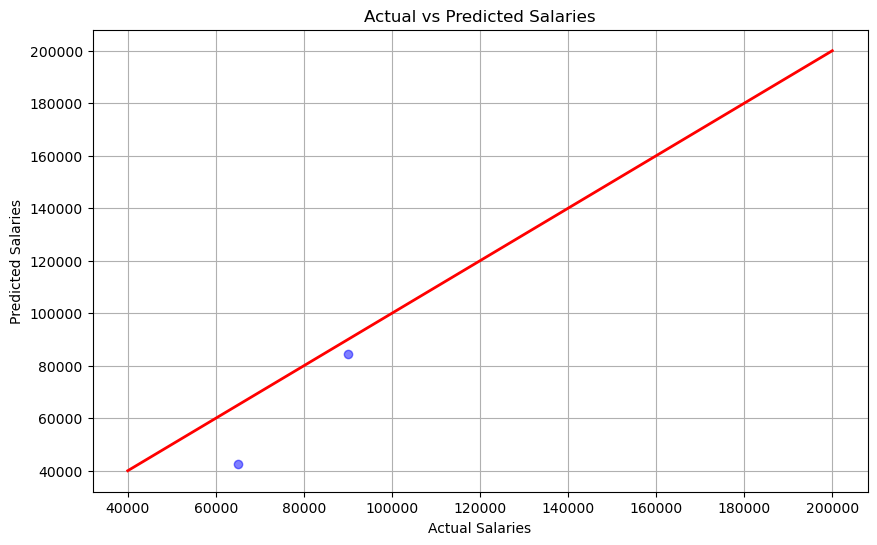

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.grid()
plt.show()

[Text(0.4444444444444444, 0.9166666666666666, 'Age <= 28.5\ngini = 0.875\nsamples = 8\nvalue = [1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'Education Level <= 1.5\ngini = 0.857\nsamples = 7\nvalue = [1, 0, 1, 1, 1, 1, 1, 1]'),
 Text(0.3333333333333333, 0.5833333333333334, 'Gender <= 1.0\ngini = 0.75\nsamples = 4\nvalue = [1, 0, 1, 1, 1, 0, 0, 0]'),
 Text(0.2222222222222222, 0.4166666666666667, 'Salary <= 67500.0\ngini = 0.667\nsamples = 3\nvalue = [1, 0, 1, 1, 0, 0, 0, 0]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.3333333333333333, 0.25, 'Age <= 31.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0, 0, 0]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0]'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0, 

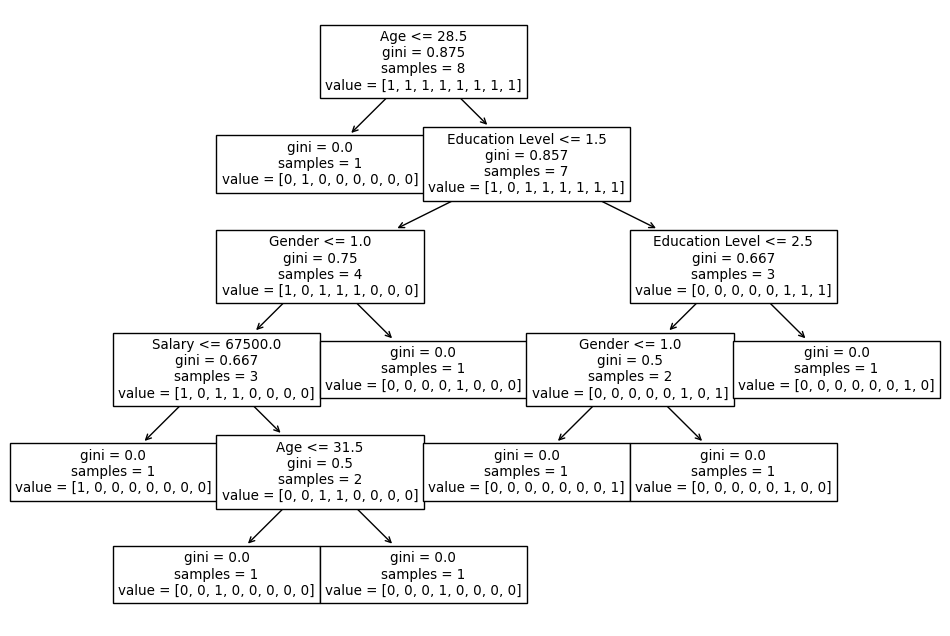

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

df_limited = df.head(8)
features = ['Age', 'Education Level', 'Gender', 'Salary']

X = df_limited[features]
y = df_limited['Years of Experience']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, feature_names=features)

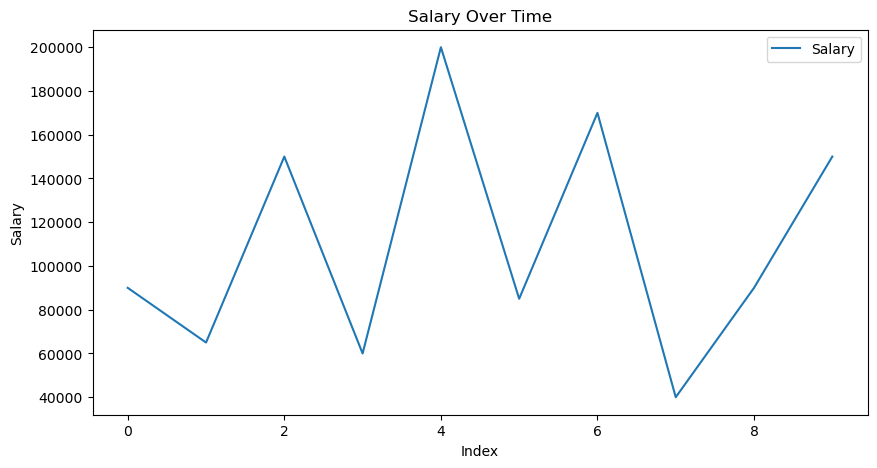

                               SARIMAX Results                                
Dep. Variable:                 Salary   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -111.190
Date:                Thu, 17 Oct 2024   AIC                            228.381
Time:                        13:37:13   BIC                            228.972
Sample:                             0   HQIC                           227.104
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7633      0.247     -3.084      0.002      -1.248      -0.278
ma.L1         -0.0591      0.388     -0.152      0.879      -0.820       0.702
sigma2      2.928e+09   3.17e-11   9.25e+19      0.0

In [11]:
from statsmodels.tsa.arima.model import ARIMA


data = {
    'Age': [32, 28, 45, 36, 52, 35, 43, 29, 34, 44],
    'Gender': [0, 2, 0, 2, 0, 2, 0, 2, 1, 2],
    'Education Level': [0, 2, 3, 1, 2, 1, 2, 1, 1, 3],
    'Years of Experience': [5, 3, 15, 7, 20, 8, 19, 2, 7, 15],
    'Salary': [90000, 65000, 150000, 60000, 200000, 85000, 170000, 40000, 90000, 150000]
}
df = pd.DataFrame(data)
salary = df['Salary']

plt.figure(figsize=(10, 5))
plt.plot(salary, label='Salary')
plt.title('Salary Over Time')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.legend()
plt.show()


model = ARIMA(salary, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

forecast = model_fit.forecast(steps=5)
print("\nForecasted Salary:", forecast)
